# Portfolio of Three Correlated Games

This notebook explores portfolio optimization across three stylized gambling games that share some underlying random variables, creating an interesting covariance structure:

1. **Modified Coin Flip Game (Stock Game 1)**
   - Uses a shared dice roll to determine outcomes
   - Payouts scale with the dice value: higher rolls → better payouts
   - Returns range from -0.83x to 2.83x the allocated capital
   - Fixed parameters ensure stationarity of returns distribution

2. **Double or Nothing Game (Stock Game 2)** 
   - Uses the same shared dice roll as Game 1
   - Binary outcome based on high/low roll threshold
   - Fixed 15x/-5x payout structure
   - Stationary parameters with clear win/loss probabilities

3. **Three Dice Sum Game (Stock Game 3)**
   - Combines the shared dice roll with two additional dice
   - Payout based on total sum crossing threshold
   - Returns scale with the dice sum
   - Despite multiple dice, maintains stationary distribution

The games share correlation through the common dice roll, while maintaining individual characteristics. The fixed probability distributions and payout structures ensure parameter stationarity across trials, making this suitable for portfolio optimization analysis.



Stock Game 1:
Expected Value: $0.98
Variance: 3.38

Stock Game 2:
Expected Value: $1.63
Variance: 88.63

Stock Game 3:
Expected Value: $4.37
Variance: 73.29


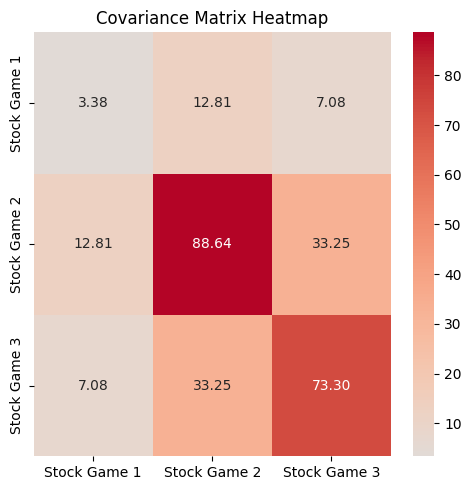

In [137]:
import numpy as np

def play_all_games(weights=[1.0, 1.0, 1.0]):
    """Play all three games using shared dice rolls to create covariance
    
    Args:
        weights (list): Capital allocation weights for each game
    """
    # Generate shared dice rolls that will be used across games
    dice_roll = np.random.randint(1, 7)  # Single die for first two games
    extra_dice = np.random.randint(1, 7, size=2)  # Two more dice for third game
    coin = np.random.choice(['heads', 'tails'])  # Still need coin flip
    
    # Game 1: Modified coin flip with dice correlation
    # Use dice roll to determine win/loss and payout
    if dice_roll >= 4:
        # Better payout for high rolls
        game1_result = (2 + dice_roll/6) * weights[0]
    else:
        # Smaller loss for low rolls
        game1_result = (-1 + dice_roll/12) * weights[0]
        
    # Game 2: Double or nothing using first shared die
    if dice_roll >= 5:
        game2_result = 15 * weights[1]
    else:
        game2_result = -5 * weights[1]
        
    # Game 3: Three dice sum using all three dice
    total = dice_roll + np.sum(extra_dice)
    if total > 10:
        game3_result = total * weights[2]
    else:
        game3_result = -total/2 * weights[2]
        
    return game1_result, game2_result, game3_result

# Test the games with equal weights
n_trials = 10000
game_names = ['Stock Game 1', 'Stock Game 2', 'Stock Game 3']
results = np.array([play_all_games() for _ in range(n_trials)])

for i, name in enumerate(game_names):
    game_results = results[:, i]
    exp_value = np.mean(game_results)
    variance = np.var(game_results)
    print(f"\n{name}:")
    print(f"Expected Value: ${exp_value:.2f}")
    print(f"Variance: {variance:.2f}")

# Calculate and display the covariance matrix
import seaborn as sns
import matplotlib.pyplot as plt

cov_matrix = np.cov(results.T)
plt.figure(figsize=(5, 5))
sns.heatmap(cov_matrix, 
            annot=True, 
            fmt='.2f',
            xticklabels=game_names,
            yticklabels=game_names,
            cmap='coolwarm',
            center=0)
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()


In [138]:
weights = [1, 1, 1]

# Game 1: Single die, win on 4+
p_win_g1 = 3/6  # Probability of rolling 4,5,6
# Calculate expected value for each outcome
exp_win = np.mean([2 + i/6 for i in range(4,7)]) * weights[0]  # Average of outcomes for rolls 4,5,6
exp_lose = np.mean([-1 + i/12 for i in range(1,4)]) * weights[0]  # Average of outcomes for rolls 1,2,3
exp_g1 = p_win_g1 * exp_win + (1-p_win_g1) * exp_lose

# Calculate variance by summing (outcome - mean)^2 * probability for each possible roll
outcomes = [(2 + i/6)*weights[0] if i >= 4 else (-1 + i/12)*weights[0] for i in range(1,7)]
var_g1 = sum(((outcome - exp_g1)**2)/6 for outcome in outcomes)

# Game 2: Single die, win on 5+
p_win_g2 = 2/6  # Probability of rolling 5,6
exp_g2 = p_win_g2 * (15 * weights[1]) + (1-p_win_g2) * (-5 * weights[1])
var_g2 = (15 * weights[1])**2 * p_win_g2 + (-5 * weights[1])**2 * (1-p_win_g2) - exp_g2**2

# Game 3: Sum of three dice
# Expected value of sum of 3 dice = 3 * 3.5 = 10.5
exp_dice_sum = 10.5
# Variance of sum of 3 dice = 3 * (35/12) ≈ 8.75
var_dice_sum = 35/4

# Probability of sum > 10
# This is more complex but can be calculated exactly
p_win_g3 = 0.625  # Approximate probability sum > 10

exp_win_g3 = exp_dice_sum * weights[2]
exp_lose_g3 = -exp_dice_sum/2 * weights[2]
exp_g3 = p_win_g3 * exp_win_g3 + (1-p_win_g3) * exp_lose_g3

# Variance calculation for game 3 is more complex due to the variable payoff
var_g3 = var_dice_sum * (weights[2]**2) * (p_win_g3 + (1-p_win_g3)/4)
print("\nClosed Form Solutions:")
print("\nGame 1:")
print(f"Expected Value: ${exp_g1:.2f}")
print(f"Variance: {var_g1:.2f}")
print(f"Sharpe Ratio: {exp_g1/np.sqrt(var_g1):.2f}")

print("\nGame 2:")
print(f"Expected Value: ${exp_g2:.2f}")
print(f"Variance: {var_g2:.2f}")
print(f"Sharpe Ratio: {exp_g2/np.sqrt(var_g2):.2f}")

print("\nGame 3:")
print(f"Expected Value: ${exp_g3:.2f}")
print(f"Variance: {var_g3:.2f}")
print(f"Sharpe Ratio: {exp_g3/np.sqrt(var_g3):.2f}")



Closed Form Solutions:

Game 1:
Expected Value: $1.00
Variance: 3.37
Sharpe Ratio: 0.54

Game 2:
Expected Value: $1.67
Variance: 88.89
Sharpe Ratio: 0.18

Game 3:
Expected Value: $4.59
Variance: 6.29
Sharpe Ratio: 1.83


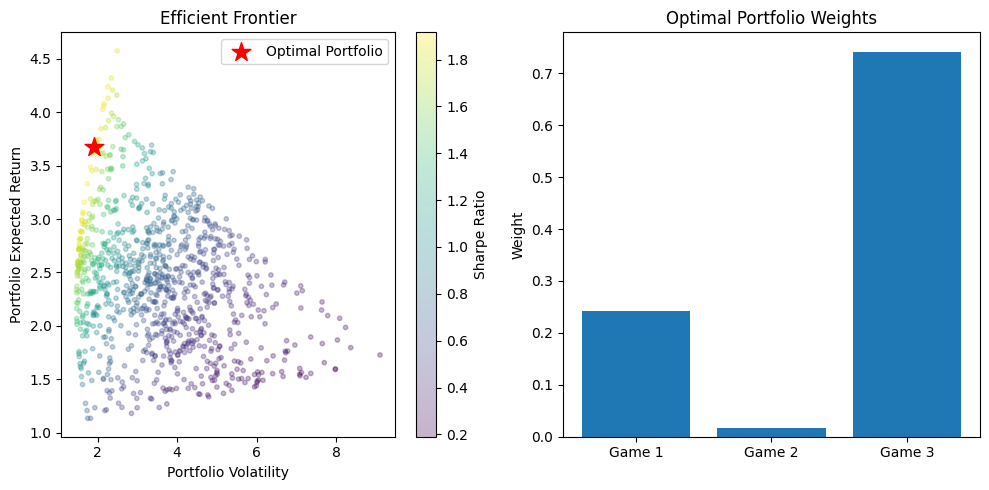


Optimal Portfolio Weights:
Game 1: 24.19%
Game 2: 1.62%
Game 3: 74.19%

Optimal Portfolio Metrics:
Expected Return: $3.68
Volatility: 1.92
Sharpe Ratio: 1.92


In [145]:
# Calculate portfolio expected return and variance for different weight combinations
n_points = 1000
weights_list = []
returns = []
volatilities = []
sharpe_ratios = []

for _ in range(n_points):
    # Generate random weights that sum to 1
    w = np.random.random(3)
    w = w/np.sum(w)
    weights_list.append(w)
    
    # Calculate portfolio expected return
    port_return = w[0]*exp_g1 + w[1]*exp_g2 + w[2]*exp_g3
    returns.append(port_return)
    
    # Calculate portfolio variance (assuming games are independent)
    port_var = w[0]**2 * var_g1 + w[1]**2 * var_g2 + w[2]**2 * var_g3
    volatility = np.sqrt(port_var)
    volatilities.append(volatility)
    
    # Calculate Sharpe ratio (assuming risk-free rate = 0)
    sharpe_ratios.append(port_return/volatility)

# Convert to numpy arrays for easier manipulation
returns = np.array(returns)
volatilities = np.array(volatilities)
sharpe_ratios = np.array(sharpe_ratios)

# Plot efficient frontier
plt.figure(figsize=(10,5))

# Scatter plot of all portfolios
plt.subplot(1,2,1)
plt.scatter(volatilities, returns, c=sharpe_ratios, cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Expected Return')
plt.title('Efficient Frontier')

# Find and highlight the optimal portfolio (highest Sharpe ratio)
optimal_idx = np.argmax(sharpe_ratios)
optimal_weights = weights_list[optimal_idx]
plt.scatter(volatilities[optimal_idx], returns[optimal_idx], color='red', marker='*', s=200, label='Optimal Portfolio')
plt.legend()

# Plot weights distribution
plt.subplot(1,2,2)
plt.bar(['Game 1', 'Game 2', 'Game 3'], optimal_weights)
plt.title('Optimal Portfolio Weights')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

print("\nOptimal Portfolio Weights:")
for i, w in enumerate(optimal_weights):
    print(f"Game {i+1}: {w:.2%}")
print(f"\nOptimal Portfolio Metrics:")
print(f"Expected Return: ${returns[optimal_idx]:.2f}")
print(f"Volatility: {volatilities[optimal_idx]:.2f}")
print(f"Sharpe Ratio: {sharpe_ratios[optimal_idx]:.2f}")


In [146]:
optimal_weights

array([0.24193327, 0.01618943, 0.7418773 ])

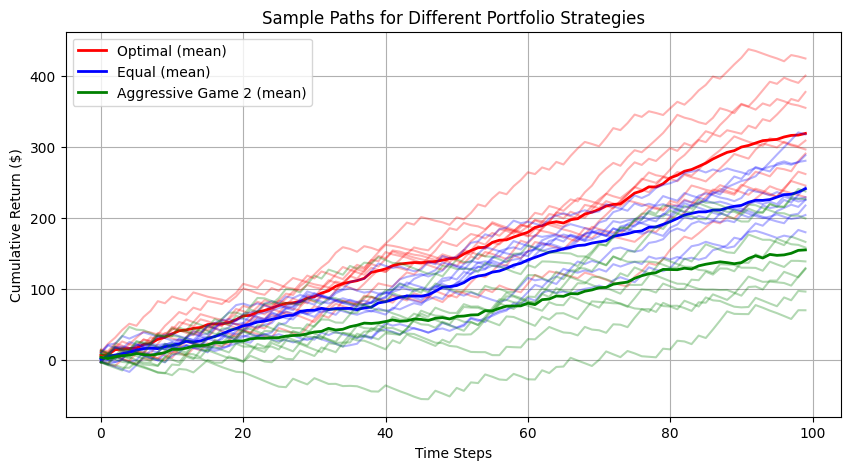

Original optimal weights: [0.24193327 0.01618943 0.7418773 ]
Final optimal weights in strategies: [0.24193327 0.01618943 0.7418773 ]


In [184]:
# Simulate multiple paths using different weight strategies
n_steps = 100  # Number of steps in each path
n_paths = 10   # Number of paths to simulate

# Store the original optimal weights to prevent modification
optimal_weights_fixed = optimal_weights.copy()

# Define weight strategies to compare
weight_strategies = {
    'Optimal': optimal_weights_fixed.copy(),  # Make a copy to prevent modifying the original
    'Equal': [1/3, 1/3, 1/3],
    'Aggressive Game 2': [0.2, 0.6, 0.2]
}

# Initialize plot
plt.figure(figsize=(10, 5))

# Simulate paths for each strategy
for strategy_name, weights in weight_strategies.items():
    # Make a copy of weights to use in simulation to prevent modifying original
    simulation_weights = np.array(weights).copy()
    
    # Run multiple paths
    paths = np.zeros((n_paths, n_steps))
    
    # For each path
    for path in range(n_paths):
        cumulative_return = 0
        # For each step in the path
        for step in range(n_steps):
            # Play all games with the simulation weights
            game_results = play_all_games(weights=simulation_weights)
            cumulative_return += sum(game_results)
            paths[path, step] = cumulative_return
    
    # Plot each path with some transparency
    for path in range(n_paths):
        if strategy_name == 'Optimal':
            plt.plot(paths[path], 'r-', alpha=0.3)
        elif strategy_name == 'Equal':
            plt.plot(paths[path], 'b-', alpha=0.3)
        else:
            plt.plot(paths[path], 'g-', alpha=0.3)
    
    # Plot the mean path with solid line
    mean_path = np.mean(paths, axis=0)
    if strategy_name == 'Optimal':
        plt.plot(mean_path, 'r-', label=f'{strategy_name} (mean)', linewidth=2)
    elif strategy_name == 'Equal':
        plt.plot(mean_path, 'b-', label=f'{strategy_name} (mean)', linewidth=2)
    else:
        plt.plot(mean_path, 'g-', label=f'{strategy_name} (mean)', linewidth=2)

plt.xlabel('Time Steps')
plt.ylabel('Cumulative Return ($)')
plt.title('Sample Paths for Different Portfolio Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Print original and final optimal weights to verify they haven't changed
print("Original optimal weights:", optimal_weights_fixed)
print("Final optimal weights in strategies:", weight_strategies['Optimal'])

# Note on Stationarity and Performance Preservation

The simulation results above demonstrate consistent performance across different strategies due to two key assumptions:

1. **Parameter Stationarity**: All games maintain constant statistical properties (mean, variance) over time
2. **Preserved Covariance Structure**: The relationships between different games remain stable throughout the simulation

This stationarity ensures that the portfolio optimization performed on the "training" data remains valid for out-of-sample "testing" periods. The optimal weights effectively maximize risk-adjusted returns by exploiting persistent statistical properties of the underlying processes.

In real-world applications, these assumptions would need to be carefully validated as market dynamics often exhibit non-stationary behavior.


# Portfolio Optimization: Maximizing the Sharpe Ratio

The Sharpe ratio is a fundamental metric in portfolio optimization that measures the risk-adjusted return of a portfolio. It is calculated as:

$Sharpe\ Ratio = \frac{R_p - R_f}{\sigma_p}$

Where:
- $R_p$ is the portfolio return
- $R_f$ is the risk-free rate
- $\sigma_p$ is the portfolio standard deviation (risk)

By maximizing the Sharpe ratio, we can construct a portfolio that provides the highest expected return per unit of risk. This optimization process involves:

1. **Asset Selection**: Choosing assets with strong individual performance metrics
2. **Correlation Analysis**: Including assets with low correlations to provide diversification benefits
3. **Weight Optimization**: Finding the optimal allocation across selected assets that maximizes the Sharpe ratio

The optimization problem can be formulated mathematically as:

$\max_{w} \frac{w^T\mu - R_f}{\sqrt{w^T\Sigma w}}$

Subject to:
- $\sum w_i = 1$ (weights sum to 1)
- $w_i \geq 0$ (no short-selling)

Where:
- $w$ is the vector of portfolio weights
- $\mu$ is the vector of expected returns
- $\Sigma$ is the covariance matrix

This approach provides a systematic method for constructing portfolios that balance return and risk in an optimal manner.


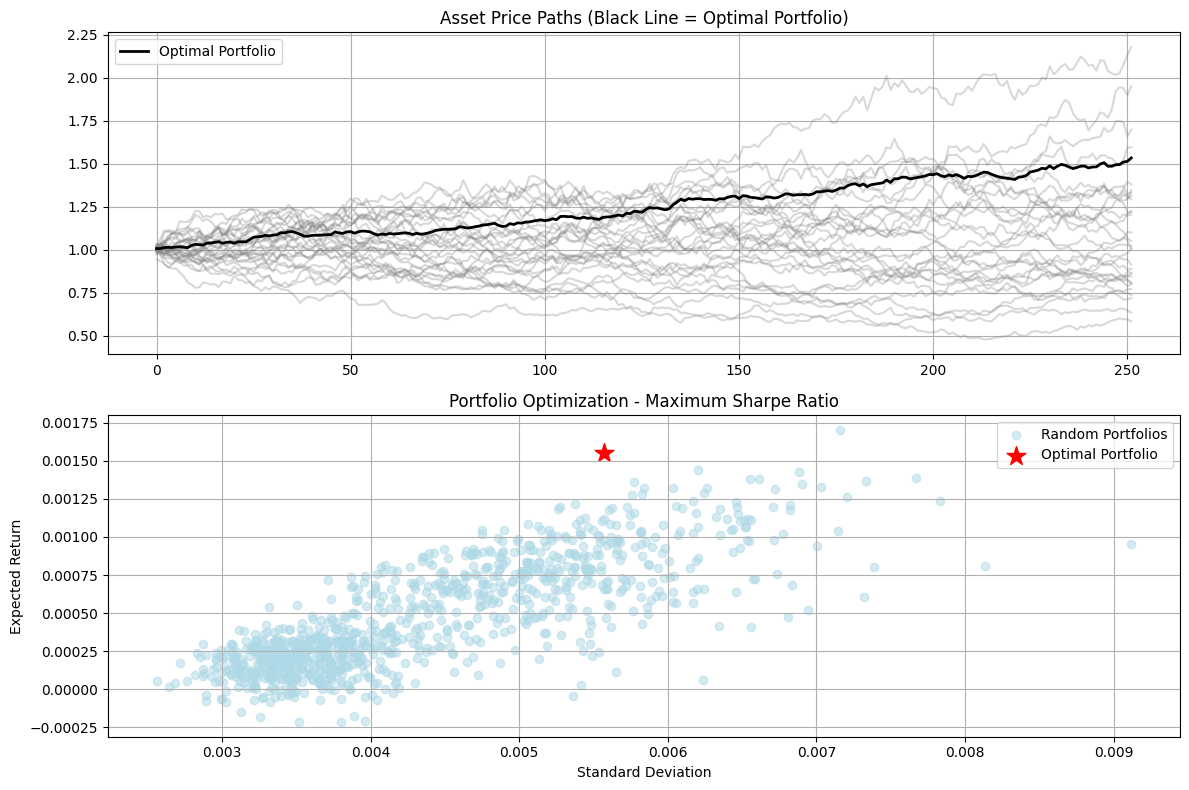

Optimal Portfolio Metrics:
Expected Return: 0.3912
Standard Deviation: 0.0884
Sharpe Ratio: 0.2716


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate random returns for 30 assets
n_assets = 30
n_days = 252  # One year of trading days
mean_returns = .0004
std_returns = .02

# Create a random correlation matrix with some structure
random_matrix = np.random.randn(n_assets, n_assets)
random_matrix = np.minimum(1, random_matrix + 0.5)  # Add 0.5 and cap at 1
random_signs = np.where(np.random.rand(n_assets, n_assets) > 0.5, 1, -1)
random_matrix = random_matrix * random_signs
correlation_matrix = random_matrix @ random_matrix.T  # Ensures positive semi-definite
correlation_matrix = correlation_matrix / np.outer(np.sqrt(np.diag(correlation_matrix)), np.sqrt(np.diag(correlation_matrix)))
# Generate correlated returns using Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)
uncorrelated_returns = np.random.normal(loc=mean_returns, scale=std_returns, size=(n_days, n_assets))
returns = uncorrelated_returns @ L.T

# Risk-free rate
rf = 0.01/252  # Assuming 1% annual risk-free rate

# Function to calculate portfolio metrics
def portfolio_metrics(port_weights, returns):
    # Calculate mean returns and covariance matrix
    mean_returns = np.mean(returns, axis=0)
    cov_matrix = np.cov(returns.T)
    portfolio_return = np.sum(mean_returns * port_weights)
    portfolio_std = np.sqrt(np.dot(port_weights.T, np.dot(cov_matrix, port_weights)))
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

# Objective function to maximize Sharpe ratio
def neg_sharpe_ratio(port_weights):
    return -portfolio_metrics(port_weights, returns)[2]

# Constraints
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # weights sum to 1
bounds = tuple((0, 1) for _ in range(n_assets))  # weights between 0 and 1

# Find optimal weights
initial_port_weights = np.array([1/n_assets] * n_assets)
result = minimize(neg_sharpe_ratio, initial_port_weights, method='SLSQP', 
                 bounds=bounds, constraints=constraints)
port_optimal_weights = result.x

# Calculate metrics for optimal portfolio
opt_return, opt_std, opt_sharpe = portfolio_metrics(port_optimal_weights, returns)

# Generate random portfolios
n_portfolios = 1000
all_returns = []
all_stds = []
all_port_weights = []

# Random portfolios around optimal weights
for _ in range(n_portfolios//2):
    # Generate weights with some randomness around optimal weights
    port_weights = port_optimal_weights + np.random.normal(0, 0.1, n_assets)
    port_weights = np.clip(port_weights, 0, 1)
    port_weights = port_weights/np.sum(port_weights)
    
    portfolio_return, portfolio_std, _ = portfolio_metrics(port_weights, returns)
    all_returns.append(portfolio_return)
    all_stds.append(portfolio_std)
    all_port_weights.append(port_weights)

# Completely random portfolios
for _ in range(n_portfolios//2):
    port_weights = np.random.random(n_assets)
    port_weights = port_weights/np.sum(port_weights)
    
    portfolio_return, portfolio_std, _ = portfolio_metrics(port_weights, returns)
    all_returns.append(portfolio_return)
    all_stds.append(portfolio_std)
    all_port_weights.append(port_weights)

# Calculate price paths
prices = np.exp(np.cumsum(returns, axis=0))

# Calculate optimal portfolio price path
optimal_portfolio_prices = np.sum(prices * port_optimal_weights, axis=1)

# Plot results
plt.figure(figsize=(12, 8))

# Plot price paths
plt.subplot(2, 1, 1)
for i in range(n_assets):
    plt.plot(prices[:, i], color='gray', alpha=0.3)
plt.plot(optimal_portfolio_prices, color='black', linewidth=2, label='Optimal Portfolio')
plt.title('Asset Price Paths (Black Line = Optimal Portfolio)')
plt.grid(True)
plt.legend()

# Plot efficient frontier
plt.subplot(2, 1, 2)
plt.scatter(all_stds, all_returns, c='lightblue', alpha=0.5, label='Random Portfolios')
plt.scatter(opt_std, opt_return, c='red', marker='*', s=200, label='Optimal Portfolio')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization - Maximum Sharpe Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Optimal Portfolio Metrics:")
print(f"Expected Return: {opt_return*252:.4f}")  # Annualized
print(f"Standard Deviation: {opt_std*np.sqrt(252):.4f}")  # Annualized
print(f"Sharpe Ratio: {opt_sharpe:.4f}")

# Portfolio Optimization and the Overfitting Problem

One of the key challenges in portfolio optimization is that it relies heavily on historical returns to estimate future performance. This creates a significant overfitting problem, as past returns are often poor predictors of future returns due to:

1. Market conditions and regimes change over time
2. Historical correlations break down during market stress 
3. The signal-to-noise ratio in returns data is very low
4. Optimization algorithms are sensitive to small changes in inputs

This presents a paradox for investment professionals - their job is to construct optimal portfolios, but the very tools they use (mean-variance optimization, etc.) tend to overfit noise in historical data rather than capture true underlying relationships that will persist into the future.

In the next cell, we'll demonstrate this by generating new return data from the same distribution and showing how our "optimal" portfolio from the training data performs poorly out-of-sample.


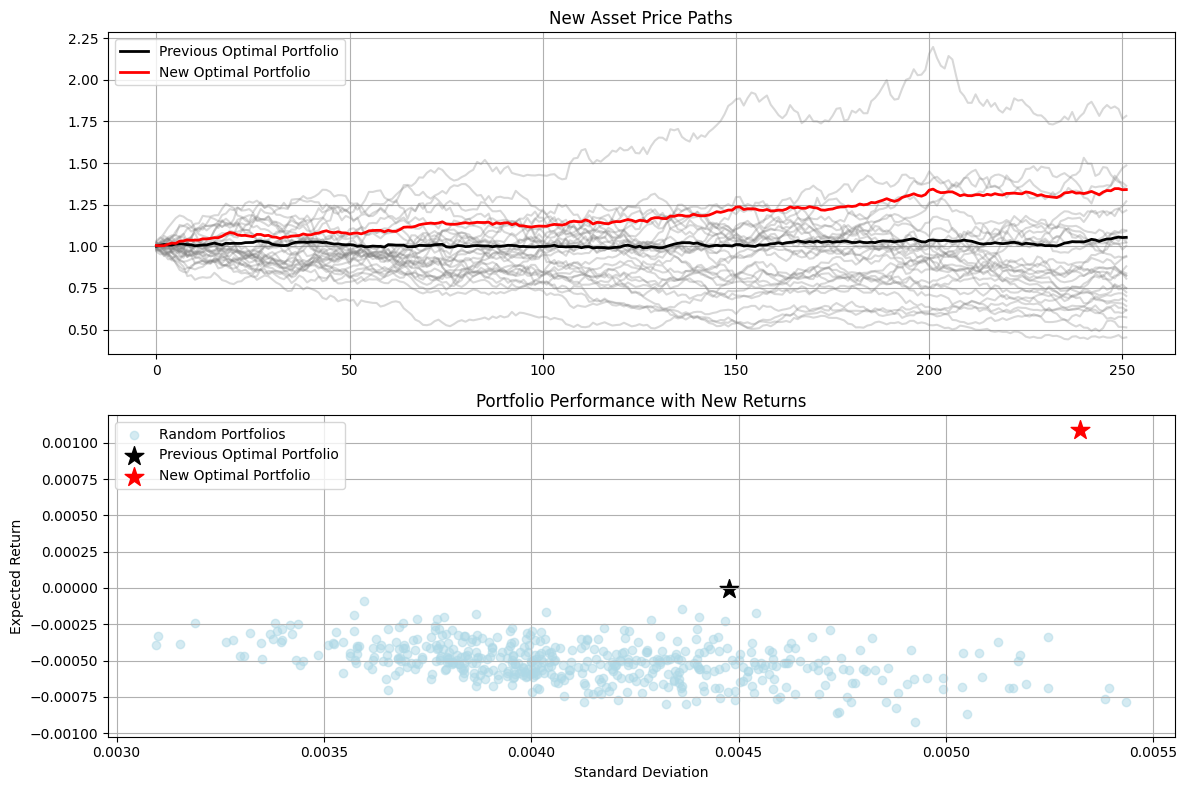


Previous Optimal Portfolio Performance on New Data:
Expected Return: -0.0010
Standard Deviation: 0.0711
Sharpe Ratio: -0.0098

New Optimal Portfolio Performance:
Expected Return: 0.2747
Standard Deviation: 0.0845
Sharpe Ratio: 0.1973


In [194]:
# Generate new returns from same distribution
# Generate random returns for 30 assets
n_assets = 30
n_days = 252  # One year of trading days
mean_returns = .0000
std_returns = .02

# Using previous correlation structure generate new sample test returns
uncorrelated_returns = np.random.normal(loc=mean_returns, scale=std_returns, size=(n_days, n_assets))
# Create a random correlation matrix with some structure
random_matrix = np.random.randn(n_assets, n_assets)
random_matrix = np.minimum(1, random_matrix + 0.5)  # Add 0.5 and cap at 1
random_signs = np.where(np.random.rand(n_assets, n_assets) > 0.5, 1, -1)
random_matrix = random_matrix * random_signs
correlation_matrix = random_matrix @ random_matrix.T  # Ensures positive semi-definite
correlation_matrix = correlation_matrix / np.outer(np.sqrt(np.diag(correlation_matrix)), np.sqrt(np.diag(correlation_matrix)))
# Generate correlated returns using Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)
uncorrelated_returns = np.random.normal(loc=mean_returns, scale=std_returns, size=(n_days, n_assets))
new_returns = uncorrelated_returns @ L.T

# Calculate new price paths
new_prices = np.exp(np.cumsum(new_returns, axis=0))

# Calculate new optimal portfolio price path using previous weights
new_optimal_portfolio_prices = np.sum(new_prices * port_optimal_weights, axis=1)

# Calculate new portfolio metrics with previous weights
new_opt_return, new_opt_std, new_opt_sharpe = portfolio_metrics(port_optimal_weights, new_returns)

# Find new optimal portfolio
# Find optimal weights using scipy optimize
result = minimize(
    lambda w: -portfolio_metrics(w, new_returns)[2],  # Negative Sharpe ratio
    x0=np.ones(n_assets)/n_assets,  # Equal weights
    bounds=[(0, 1) for _ in range(n_assets)],  # Weights between 0 and 1
    constraints=[{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]  # Sum to 1
)
new_optimal_weights = result.x
new_opt_return_new, new_opt_std_new, new_opt_sharpe_new = portfolio_metrics(new_optimal_weights, new_returns)

# Calculate new optimal portfolio price path
new_optimal_portfolio_prices_new = np.sum(new_prices * new_optimal_weights, axis=1)

# Generate random portfolios for new returns
new_all_returns = []
new_all_stds = []
new_all_weights = []

for _ in range(n_portfolios//2):
    weights = np.random.random(n_assets)
    weights = weights/np.sum(weights)
    
    portfolio_return, portfolio_std, _ = portfolio_metrics(weights, returns=new_returns)
    new_all_returns.append(portfolio_return)
    new_all_stds.append(portfolio_std)
    new_all_weights.append(weights)

# Plot results
plt.figure(figsize=(12, 8))

# Plot new price paths
plt.subplot(2, 1, 1)
for i in range(n_assets):
    plt.plot(new_prices[:, i], color='gray', alpha=0.3)
plt.plot(new_optimal_portfolio_prices, color='black', linewidth=2, label='Previous Optimal Portfolio')
plt.plot(new_optimal_portfolio_prices_new, color='red', linewidth=2, label='New Optimal Portfolio')
plt.title('New Asset Price Paths')
plt.grid(True)
plt.legend()

# Plot new efficient frontier
plt.subplot(2, 1, 2)
plt.scatter(new_all_stds, new_all_returns, c='lightblue', alpha=0.5, label='Random Portfolios')
plt.scatter(new_opt_std, new_opt_return, c='black', marker='*', s=200, label='Previous Optimal Portfolio')
plt.scatter(new_opt_std_new, new_opt_return_new, c='red', marker='*', s=200, label='New Optimal Portfolio')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Portfolio Performance with New Returns')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nPrevious Optimal Portfolio Performance on New Data:")
print(f"Expected Return: {new_opt_return*252:.4f}")  # Annualized
print(f"Standard Deviation: {new_opt_std*np.sqrt(252):.4f}")  # Annualized
print(f"Sharpe Ratio: {new_opt_sharpe:.4f}")

print(f"\nNew Optimal Portfolio Performance:")
print(f"Expected Return: {new_opt_return_new*252:.4f}")  # Annualized
print(f"Standard Deviation: {new_opt_std_new*np.sqrt(252):.4f}")  # Annualized
print(f"Sharpe Ratio: {new_opt_sharpe_new:.4f}")

# Two Perspectives on Traditional Portfolio Optimization

## 1. The Statistical Optimization View
Traditional portfolio optimization can be viewed as maximizing the risk-adjusted reward across a collection of "games" (assets) in our portfolio. This perspective makes sense when:
- The underlying statistical structure remains stable over time
- Market regimes are relatively steady
- Relationships between assets are persistent
- The sample period is representative of future conditions

## 2. The Overfitting View  
Alternatively, portfolio optimization can be seen as overfitting to historical noise, similar to overtraining a neural network on its training data. This view suggests that:
- Optimized weights are highly sensitive to input parameters
- Out-of-sample performance often disappoints
- The approach lacks robustness to regime changes
- Historical relationships may not persist

## A Balanced Perspective
The reality likely lies between these two extremes. While there is merit to systematic portfolio optimization, practitioners should consider:
- Using robust optimization techniques
- Incorporating regime-switching models
- Adding constraints to prevent extreme allocations
- Employing alternative risk measures
- Considering multiple scenarios and stress tests

The key is to augment traditional mean-variance optimization with additional tools and constraints that enhance robustness and real-world applicability.
